In [1]:
import numpy as np
import time, sys, os, copy
import matplotlib
import matplotlib.pyplot as plt
import itertools

from tuning.tuning_curve_noncyclic import *
from tuning.tuning_curve_optimizer_noncyclic import *

## TuningCurve_Noncyclic class

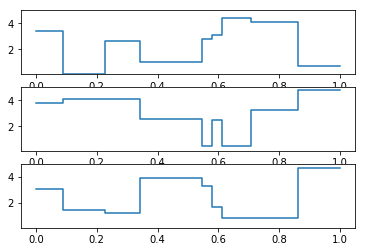

In [2]:
fp = 5.0 # 1.0 for gaussian, e.g.
fm = 0.1
numNeuro = 3
numBin = 9
tuning0 = np.random.uniform(fm, fp, (numNeuro, numBin))
weight0 = np.random.uniform(0, 1, numBin)#1.0*np.ones(numBin)/numBin
weight0 /= np.sum(weight0)

fig = plt.figure()
_ = plot_funcs_in_figure(fig, tuning0, weight0, nrow=numNeuro, ncol=1, 
                         fp = fp + 0.01, fm = fm - 0.01)



In [3]:
inv_cov_matrix = TuningCurve_Noncyclic.sigma_to_inv_cov(sigma=0.15, nNeuro=3)
inv_cov_matrix

array([[44.44444444,  0.        ,  0.        ],
       [ 0.        , 44.44444444,  0.        ],
       [ 0.        ,  0.        , 44.44444444]])

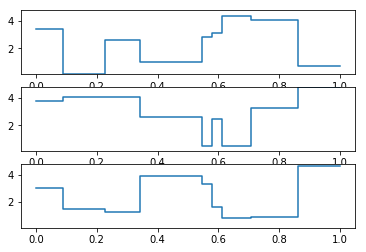

In [4]:
tc0 = TuningCurve_Noncyclic('Poisson', tuning0, weight0)
# tc0 = TuningCurve_Noncyclic('GaussianHomo', tuning0, weight0, inv_cov_matrix)
tc0.plot()

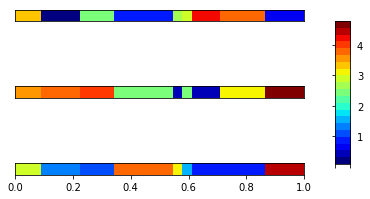

In [5]:
tc0.plot_bars()

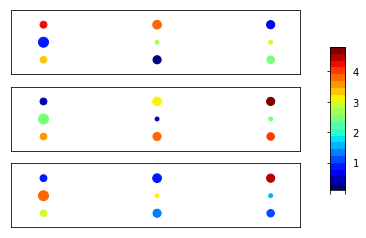

In [6]:
tc0.plot_circles(grid_shape=(3, 3, 3), max_point_size=100)

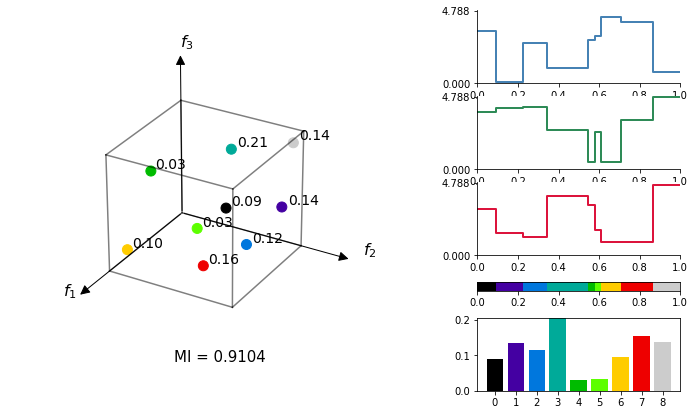

In [7]:
_ = tc0.plot_3dcube()

## TuningCurveOptimizer_Noncyclic class

In [8]:
tc_opt = TuningCurveOptimizer_Noncyclic('Poisson', tc0, fp, fm, num_threads = 8)
# tc_opt = TuningCurveOptimizer_Noncyclic('GaussianHomo', tc0, fp, fm, num_threads = 8)

In [9]:
# dir(tc_opt) # all attributes

In [10]:
len(dir(tc_opt))

77

In [11]:
tc_opt.check_list_len()

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


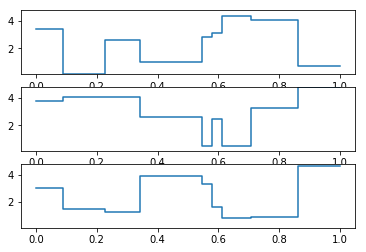

In [12]:
tc_opt.plot_res_id(0)

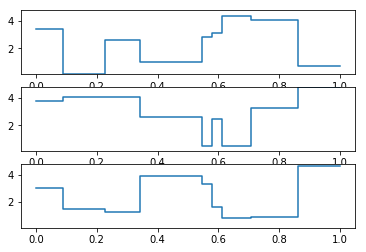

In [13]:
tc = tc_opt.take_res_id(0)
tc.plot()

### maximizing the mutual information through sgd & blahut-arimoto

In [14]:
tc_opt.iterate(total_num_iter=5, 
               sgd_learning_rate=2.0,
               sgd_batch_size=1000, # batch size for sgd
               sgd_iter_steps=100, # number of steps for sgd in every cycle
               ba_batch_size=1000, # batch size for Monte Carlo in Blahut-Arimoto
               ba_iter_steps=10, # number of steps for Blahut-Arimoto in every cycle
               save_steps=1, # save every several steps
               alter_save=True, # save the results for two alternative steps separately 
              )

1 SGD 1000 1.6798287213390395 1.7209503650665283
1 BA 1000 1.7665260406322034 0.13890814781188965
2 SGD 1000 1.7767370176068773 1.6265404224395752
2 BA 1000 1.7839622957006767 0.15726637840270996
3 SGD 1000 1.7868658729669253 1.5162303447723389
3 BA 1000 1.7828547928105625 0.10124564170837402
4 SGD 1000 1.7878824129527446 1.5850956439971924
4 BA 1000 1.7846105223144546 0.14259719848632812
5 SGD 1000 1.8099282480579044 1.5244386196136475
5 BA 1000 1.8271364491891264 0.13258743286132812


In [15]:
tc_opt.check_list_len()

11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11


In [16]:
tc_opt.mark_list

[None, 'sgd', 'ba', 'sgd', 'ba', 'sgd', 'ba', 'sgd', 'ba', 'sgd', 'ba']

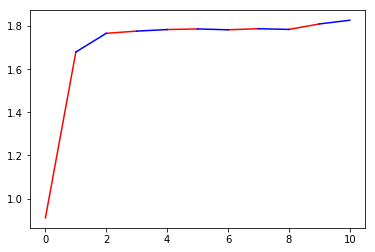

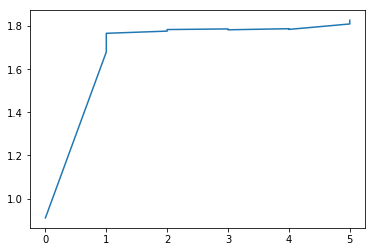

In [17]:
tc_opt.plot_info(alternate=True)
tc_opt.plot_info()

In [18]:
# reset to previous results
tc_opt.reset(2)
tc_opt.check_list_len()

3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3


<IPython.core.display.Javascript object>


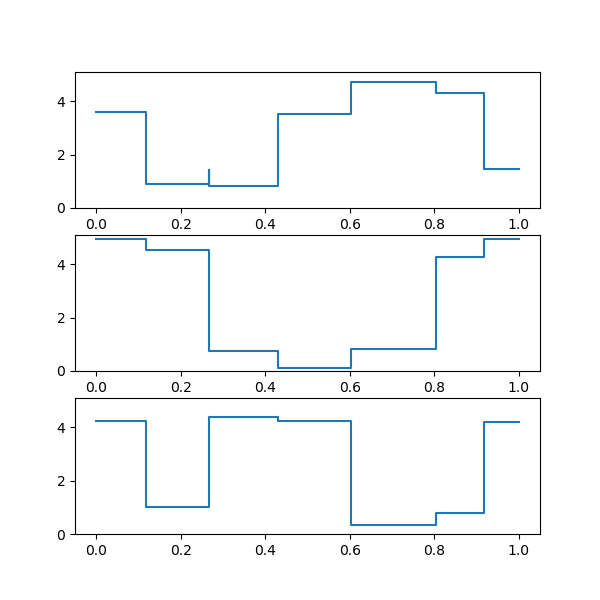

1 SGD 1000 1.722775442477352 0.027958393096923828
1 BA 1000 1.7224336737273909 0.010418415069580078
2 SGD 1000 1.6887075485782064 0.02333211898803711
2 BA 1000 1.6865610243204334 0.014059305191040039
3 SGD 1000 1.6543785355393557 0.04185009002685547
3 BA 1000 1.6574451311609082 0.016338586807250977
4 SGD 1000 1.62116728997929 0.04392075538635254
4 BA 1000 1.619484892798965 0.010825634002685547
5 SGD 1000 1.5826064710219725 0.032555341720581055
5 BA 1000 1.5935259993273496 0.024817943572998047
6 SGD 1000 1.563365548341634 0.030839204788208008
6 BA 1000 1.5633584380100127 0.01580524444580078
7 SGD 1000 1.5329416516211265 0.01988816261291504
7 BA 1000 1.5379718020787416 0.015649795532226562
8 SGD 1000 1.5081519653623936 0.021325349807739258
8 BA 1000 1.507621454115257 0.020496845245361328
9 SGD 1000 1.4776095991934846 0.02731037139892578
9 BA 1000 1.4836314658105538 0.017152070999145508
10 SGD 1000 1.456673654274999 0.05267667770385742
10 BA 1000 1.4612411154986285 0.04311013221740723
11 

In [19]:
# live plotting during iteration
%matplotlib notebook

ncol = 1
nrow = tc_opt.numNeuro
fig = plt.figure(figsize = (ncol*6, nrow*2))
ax_list = []
for i in range(tc_opt.numNeuro):
    ax = fig.add_subplot(nrow,ncol,i+1)
    ax_list.append(ax)

for i in range(tc_opt.numNeuro):
    xx, yy = pc_fun_weights(tc_opt.tuning[i,:], tc_opt.weight)
    ax_list[i].plot(xx, yy)
    ax_list[i].set_ylim([tc_opt.fm-0.1, tc_opt.fp+0.1])
#     ax_list[i].scatter(np.arange(numBin), tuning[i, :])

fig.canvas.draw()

tc_opt.iterate(total_num_iter=20, sgd_learning_rate=0.1, laplacian_coeff=0.01,              
               plot_live=True,
               plot_steps=1, # plot every several steps
               live_ax_list=ax_list,
               live_fig=fig,
              )

In [20]:
%matplotlib inline

### Maximizing the lower bound of mutual information

In [21]:
tc_opt.lower_bound_iterate(total_num_iter=50,
                           lbgd_learning_rate=5.0,
                           lbgd_iter_steps=10,
                           lbw_iter_steps=1,
                           save_steps=10,
                           #compute_lbinfo=False,
                          )

10 LB 1.449673488025482 0.002061128616333008
10 MI 1.8574351528968338 0.002061128616333008
10 LB 1.4505027570648013 0.002061128616333008 0.0016505718231201172
10 MI 1.8541367182880364 0.002061128616333008 0.0016505718231201172
20 LB 1.4508842572742902 0.004566192626953125
20 MI 1.8549756557470545 0.004566192626953125
20 LB 1.4508842572742902 0.004566192626953125 0.0012769699096679688
20 MI 1.8527711137668745 0.004566192626953125 0.0012769699096679688
30 LB 1.450884340127795 0.0040934085845947266
30 MI 1.855122717637744 0.0040934085845947266
30 LB 1.450884340127795 0.0040934085845947266 0.001291513442993164
30 MI 1.852305984452304 0.0040934085845947266 0.001291513442993164
40 LB 1.4508843464463208 0.012945890426635742
40 MI 1.858494619725756 0.012945890426635742
40 LB 1.4508843464463208 0.012945890426635742 0.001119375228881836
40 MI 1.8550613560810485 0.012945890426635742 0.001119375228881836
50 LB 1.4508843469246404 0.0035278797149658203
50 MI 1.85369618905374 0.0035278797149658203
50

In [22]:
tc_opt.mark_list

[None,
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'sgd',
 'ba',
 'lbgd',
 'lbw',
 'lbgd',
 'lbw',
 'lbgd',
 'lbw',
 'lbgd',
 'lbw',
 'lbgd',
 'lbw']

In [23]:
tc_opt.check_list_len()

53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53


In [24]:
tc_opt.lower_bound_iterate(total_num_iter=50,
                           lbgd_learning_rate=5.0,
                           lbgd_iter_steps=10,
                           lbw_iter_steps=1,
                           save_steps=10,
                           alter_save=False, # do not save alternatively
                           compute_lbinfo=False, # do not save the lower bound
                          )

10 MI 1.8481850969520213 0.004573822021484375 0.001287221908569336
20 MI 1.8530284304971054 0.007944822311401367 0.0009393692016601562
30 MI 1.8514260048261153 0.018405437469482422 0.0010578632354736328
40 MI 1.8507650415183052 0.00425267219543457 0.0012350082397460938
50 MI 1.853546515185487 0.001699686050415039 0.0005524158477783203


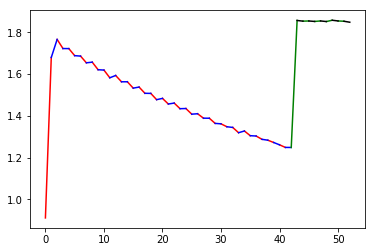

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
tc_opt.plot_info(ax, alternate=True)
tc_opt.plot_info(ax, alternate=True, mark1='lbgd', mark2='lbw', color1='g', color2='k')

### plotting and saving results

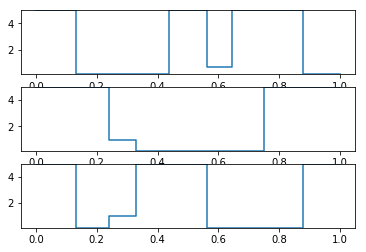

In [26]:
tc_opt.plot_res_id(-1)

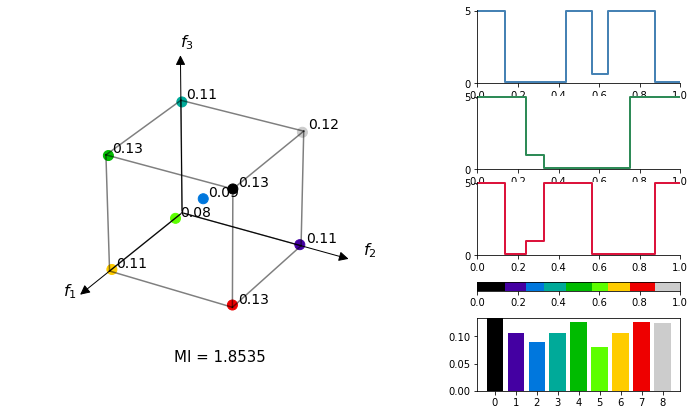

In [27]:
_ = tc_opt.take_res_id(-1).plot_3dcube()

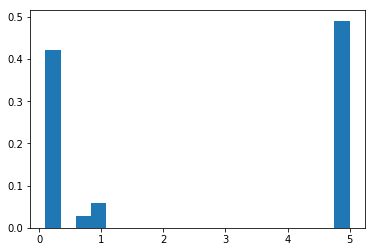

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = tc_opt.take_res_id(-1).plot_hist(ax, bins=20)#neuro_id=0

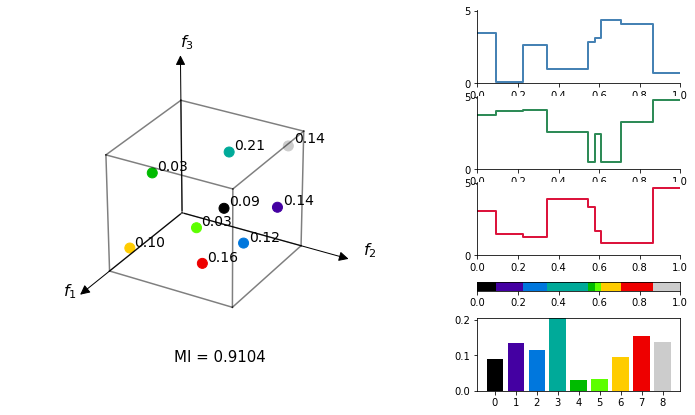

In [29]:
# plot animations
# tc_opt.plot_animation()
tc_opt.plot_animation_cube(file_name='temp', add_time=False)

In [30]:
# save results
tc_opt.save_res_dict(file_name='temp', add_time=False)

In [31]:
# load results
tc_opt =TuningCurveOptimizer_Noncyclic.load_res_dict("temp.npy")

## 2d laplacian

In [39]:
tc_opt.reset(0)

In [40]:
tc_opt.laplacian_2d, tc_opt.laplacian_shape

(False, None)

In [41]:
tc_opt.iterate(total_num_iter=20, sgd_learning_rate=0.25, laplacian_coeff=0.01,
               save_steps=10,
               sgd_batch_size=10000, ba_batch_size=10000,
               laplacian_2d=True,
               laplacian_shape=(3,3,3),
              )

10 SGD 10000 0.45341164095335473 0.11873030662536621
10 BA 10000 0.45265657081319016 0.10876083374023438
20 SGD 10000 0.5750142190603348 0.14867639541625977
20 BA 10000 0.5669661185978786 0.13798952102661133


In [42]:
tc_opt.laplacian_2d, tc_opt.laplacian_shape

(True, (3, 3, 3))

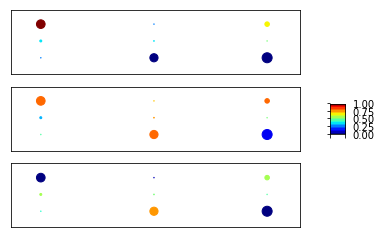

In [43]:
%matplotlib inline
_ = tc_opt.take_res_id(-1).plot_circles(grid_shape=tc_opt.laplacian_shape, max_point_size=100)

## Inhomogeneous Gaussian

In [44]:
fp = 1.0#5.0
fm = 0.001#0.1
numNeuro = 3
numBin = 9
tuning0 = np.random.uniform(fm, fp, (numNeuro, numBin))
weight0 = np.random.uniform(0, 1, numBin)#1.0*np.ones(numBin)/numBin
weight0 /= np.sum(weight0)

In [45]:
inv_cov_matrix = np.zeros((numNeuro,numNeuro, numBin))
for j in range(numBin):
    sigma_j = 0.1+0.05*j
    
#     inv_cov_matrix[:,:,j] = TuningCurve_Noncyclic.sigma_to_inv_cov(sigma=0.1+0.05*j, nNeuro=numNeuro)
    inv_cov_matrix[:,:,j] += 0.01
    np.fill_diagonal(inv_cov_matrix[:,:,j], 1.0/sigma_j**2)
    print(inv_cov_matrix[:,:,j])

[[1.e+02 1.e-02 1.e-02]
 [1.e-02 1.e+02 1.e-02]
 [1.e-02 1.e-02 1.e+02]]
[[4.44444444e+01 1.00000000e-02 1.00000000e-02]
 [1.00000000e-02 4.44444444e+01 1.00000000e-02]
 [1.00000000e-02 1.00000000e-02 4.44444444e+01]]
[[2.5e+01 1.0e-02 1.0e-02]
 [1.0e-02 2.5e+01 1.0e-02]
 [1.0e-02 1.0e-02 2.5e+01]]
[[1.6e+01 1.0e-02 1.0e-02]
 [1.0e-02 1.6e+01 1.0e-02]
 [1.0e-02 1.0e-02 1.6e+01]]
[[1.11111111e+01 1.00000000e-02 1.00000000e-02]
 [1.00000000e-02 1.11111111e+01 1.00000000e-02]
 [1.00000000e-02 1.00000000e-02 1.11111111e+01]]
[[8.16326531 0.01       0.01      ]
 [0.01       8.16326531 0.01      ]
 [0.01       0.01       8.16326531]]
[[6.25 0.01 0.01]
 [0.01 6.25 0.01]
 [0.01 0.01 6.25]]
[[4.9382716 0.01      0.01     ]
 [0.01      4.9382716 0.01     ]
 [0.01      0.01      4.9382716]]
[[4.   0.01 0.01]
 [0.01 4.   0.01]
 [0.01 0.01 4.  ]]


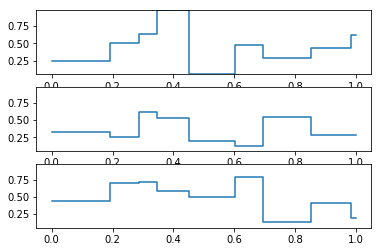

In [46]:
tc0 = TuningCurve_Noncyclic('GaussianInhomo', tuning0, weight0, inv_cov_matrix)
tc0.plot()

In [47]:
tc_opt = TuningCurveOptimizer_Noncyclic('GaussianInhomo', tc0, fp, fm, num_threads = 8)

In [48]:
tc_opt.iterate(total_num_iter=50, 
               sgd_learning_rate=0.2, 
               laplacian_coeff=0.01,
               sgd_batch_size=1000, 
               ba_batch_size=1000,
               save_steps=10,
               )

10 SGD 1000 1.4982426091728893 0.01197671890258789
10 BA 1000 1.5010123904050041 0.02011871337890625
20 SGD 1000 1.5489594291397168 0.01786208152770996
20 BA 1000 1.5469284711009232 0.016196727752685547
30 SGD 1000 1.595982849762189 0.0119476318359375
30 BA 1000 1.598037657510479 0.012689828872680664
40 SGD 1000 1.634857494326282 0.01203775405883789
40 BA 1000 1.6317357649635456 0.027307510375976562
50 SGD 1000 1.6530442987110983 0.014202117919921875
50 BA 1000 1.6523038494538531 0.01531219482421875


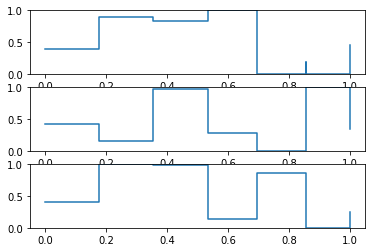

In [49]:
tc_opt.plot_res_id(-1)

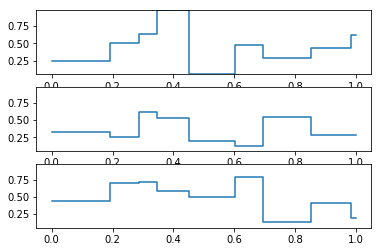

In [50]:
# no correlation case:
# 'Poisson-like' variance
inv_cov_diag = 1.0/tuning0 # shape = (numNeuro, numBin)
tc0 = TuningCurve_Noncyclic('GaussianInhomoNoCorr', tuning0, weight0, inv_cov_diag)
tc0.plot()

In [51]:
tc_opt = TuningCurveOptimizer_Noncyclic('GaussianInhomoNoCorr', tc0, fp, fm, num_threads = 8)
tc_opt.iterate(total_num_iter=50, 
               sgd_learning_rate=0.2, 
               laplacian_coeff=0.01,
               sgd_batch_size=1000, 
               ba_batch_size=1000,
               save_steps=10,
               )

10 SGD 1000 0.5392249323896741 0.008803844451904297
10 BA 1000 0.5461239806947765 0.017335891723632812
20 SGD 1000 0.6134646919373637 0.014864921569824219
20 BA 1000 0.6083577421447276 0.019500255584716797
30 SGD 1000 0.6834106395188883 0.00887155532836914
30 BA 1000 0.6817843475306052 0.01849961280822754
40 SGD 1000 0.7211221885650198 0.01340937614440918
40 BA 1000 0.7135686537194456 0.010603904724121094
50 SGD 1000 0.7242041806369942 0.01074671745300293
50 BA 1000 0.7274197021043705 0.012029647827148438


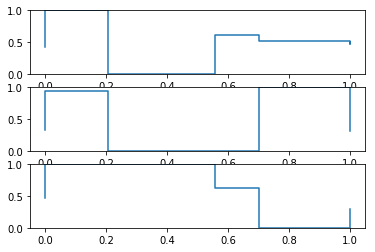

In [52]:
tc_opt.plot_res_id(-1)